In [1]:
# Instalación de dependencias desde requirements.txt
import sys
!{sys.executable} -m pip install -r ../requirements.txt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from cargar_datos import CargarDatos






[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Carga de datos integrada
df = CargarDatos()
df.head()

DEBUG: script_dir -> c:\Users\RuVe7\Desktop\ProyectoM5_MatiasGutierrez\Pi_pt_ds_01\mlops_pipeline\src
DEBUG: root_dir -> c:\Users\RuVe7\Desktop\ProyectoM5_MatiasGutierrez\Pi_pt_ds_01\mlops_pipeline
DEBUG: archivos encontrados -> ['Base_de_datos.xlsx']
DEBUG: file_name seleccionado -> Base_de_datos.xlsx
DEBUG: file_path -> c:\Users\RuVe7\Desktop\ProyectoM5_MatiasGutierrez\Pi_pt_ds_01\mlops_pipeline\Base_de_datos.xlsx
✅ Cargando archivo: Base_de_datos.xlsx
DEBUG: Carga finalizada. Dimensiones del DataFrame: (10763, 23)


,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
0,7,2024-12-21 11:31:35,3692160.0,10,42,Independiente,8000000,2500000,341296,88.768094,...,0.0,51258.0,51258.0,0.0,5,0,0,908526.0,Estable,1
1,4,2025-04-22 09:47:35,840000.0,6,60,Empleado,3000000,2000000,124876,95.227787,...,0.0,8673.0,8673.0,0.0,0,0,2,939017.0,Creciente,1
2,9,2026-01-08 12:22:40,5974028.4,10,36,Independiente,4036000,829000,529554,47.613894,...,0.0,18702.0,18702.0,0.0,3,0,0,NaN,NaN,0
3,4,2025-08-04 12:04:10,1671240.0,6,48,Empleado,1524547,498000,252420,95.227787,...,0.0,15782.0,15782.0,0.0,3,0,0,1536193.0,Creciente,1
4,9,2025-04-26 11:24:26,2781636.0,11,44,Empleado,5000000,4000000,217037,95.227787,...,0.0,204804.0,204804.0,0.0,3,0,1,933473.0,Creciente,1


### 2 Exporacion de datos

#### 2.1 Revision de nulos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

## REQUIERE MODIFICARSE CON LA BASE DE DATOS ACTUAL

Se eliminaran arquellos atributos que presenten un nivel muy alto de valores nulos, ya que requeririan un esfuerzo para imputarlos y podrian introducir sesgos en el analisis. En el caso de promedio_ingresos_datacreditos y tendencia_ingresos, ambas presentan alrededor del 30% de los valores faltantes. Si bien este porcentaje podria justificar su eliminacion, se ha decidido conservarlas temporalmente con el fin de evaluarlas en etapas posteriores y determinar si aportan valor predictivo o deben finalmente descartarse

2.1 TIPO DE VARIABLE

variables categoricas

ordinales

+ tipo_credito (politomico)
+ fecha_prestamo (politomico)

Nominales

+ tipo_laboral (Dicotomico)
+ tendencia_ingresos (politomico)

Variables numericas

Continuas

* capital_prestado
* salario_cliente
* total_otros_prestamos
* puntaje
* puntaje_datacredito
* saldo_mora
* saldo_total
* saldo_principal
* Promedio_ingresos_datacredito

Discretas

* plazo_meses
* edad_cliente
* couta_pactada
* cant_creditosvigentes
* huella_consulta
* creditos_sectorFinanciero
* creditos_sectorCooperativo
* creditos_sectorReal






No era relevante para los objetivos iniciales de la exploracion, con couta pactada y capital prestado se puede saber el plazo de pago
#### Conversion de tipode datos
Se convierten las variables categoricas tipo object a category

In [4]:
df["tipo_credito"] = df["tipo_credito"].astype("category")

df["tipo_laboral"] = df["tipo_laboral"].astype("category")

df["tendencia_ingresos"] = df["tendencia_ingresos"].astype("category")



#### 2.2 Unificar la forma como se representan los valores Nulos

#### Eliminacion de variables irrelevantes



In [5]:
# --- Descripción general de los datos ---
print("Resumen de la estructura:")
df.info()

# --- Caracterización de los datos (Consigna) ---
# Clasificación manual basada en la naturaleza del dato:
# Nominales: tipo_laboral, tendencia_ingresos
# Ordinales: tipo_credito (si tiene jerarquía)
# Numéricos: capital_prestado, salario_cliente, edad_cliente, puntaje...
# Dicotómicos: Pago_atiempo (0/1)
# Politómicos: tendencia_ingresos (Creciente, Decreciente, Estable)

# --- Unificar valores Nulos ---
# Reemplazamos posibles placeholders por NaN real de numpy
df = df.replace(['?', 'N/A', 'null', 'None', '',"?", "Sin dato"], np.nan)
print(f"\nNulos por columna:\n{df.isnull().sum()}")

# --- Eliminación de variables irrelevantes ---
# Por ejemplo, IDs o fechas que no aportan al modelo estadístico puro
df = df.drop(columns=['fecha_prestamo','plazo_meses'], errors='ignore')

# --- Conversión de tipos de datos ---
# Aseguramos que las categorías sean categóricas y los números sean flotantes
cat_cols = ['tipo_laboral', 'tendencia_ingresos', 'Pago_atiempo']
for col in cat_cols:
    df[col] = df[col].astype('category')

num_cols = df.select_dtypes(include=[np.number]).columns
print(f"\nVariables numéricas procesadas: {list(num_cols)}")

Resumen de la estructura:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  category      
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  category      
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   tipo_credito                   10763 non-null  category
 1   capital_prestado               10763 non-null  float64 
 2   edad_cliente                   10763 non-null  int64   
 3   tipo_laboral                   10763 non-null  category
 4   salario_cliente                10763 non-null  int64   
 5   total_otros_prestamos          10763 non-null  int64   
 6   cuota_pactada                  10763 non-null  int64   
 7   puntaje                        10763 non-null  float64 
 8   puntaje_datacredito            10757 non-null  float64 
 9   cant_creditosvigentes          10763 non-null  int64   
 10  huella_consulta                10763 non-null  int64   
 11  saldo_mora                     10607 non-null  float64 
 12  saldo_total                    1

### EDA
#### Analisis Univariable
##### Para variables numericas usamos .describe

In [7]:
#Variables numericas

df.describe()

,capital_prestado,edad_cliente,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,cant_creditosvigentes,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito
count,1.076300e+04,10763.000000,1.076300e+04,1.076300e+04,1.076300e+04,10763.000000,10757.000000,10763.000000,10763.000000,10607.000000,1.060700e+04,1.035800e+04,10173.000000,10763.000000,10763.000000,10763.000000,7.833000e+03
mean,2.434315e+06,43.948620,1.721643e+07,6.238870e+06,2.436174e+05,91.170036,780.790834,5.726749,4.228561,7.746017,4.593741e+04,4.034617e+04,0.260002,2.779987,0.269813,1.302704,2.005157e+06
std,1.909643e+06,15.060877,3.554767e+08,1.184183e+08,2.104937e+05,16.465441,104.878031,3.977162,3.064683,225.955117,1.062698e+05,7.124244e+04,21.772917,2.748807,0.716471,1.824430,2.144116e+06
min,3.600000e+05,19.000000,0.000000e+00,0.000000e+00,2.394400e+04,-38.009990,-7.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.224831e+06,33.000000,2.000000e+06,5.000000e+05,1.210415e+05,95.227787,757.000000,3.000000,2.000000,0.000000,2.898000e+03,2.690000e+03,0.000000,1.000000,0.000000,0.000000,9.251570e+05
50%,1.921920e+06,42.000000,3.000000e+06,1.000000e+06,1.828630e+05,95.227787,791.000000,5.000000,4.000000,0.000000,1.617800e+04,1.444250e+04,0.000000,2.000000,0.000000,1.000000,1.204496e+06
75%,3.084840e+06,53.000000,4.875808e+06,2.000000e+06,2.878335e+05,95.227787,825.000000,8.000000,6.000000,0.000000,5.298200e+04,4.763225e+04,0.000000,4.000000,0.000000,2.000000,2.231859e+06
max,4.144415e+07,123.000000,2.200000e+10,6.787675e+09,3.816752e+06,95.227787,999.000000,62.000000,29.000000,12534.000000,5.116066e+06,1.562285e+06,2145.000000,51.000000,13.000000,25.000000,3.810658e+07


In [8]:
df_num = df.select_dtypes(include=["int64","float64"])
df_num.agg(["mean", "median", "std", "var", "min", "max", "skew", "kurt"])

,capital_prestado,edad_cliente,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,cant_creditosvigentes,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito
mean,2.434315e+06,43.948620,1.721643e+07,6.238870e+06,2.436174e+05,91.170036,780.790834,5.726749,4.228561,7.746017,4.593741e+04,4.034617e+04,0.260002,2.779987,0.269813,1.302704,2.005157e+06
median,1.921920e+06,42.000000,3.000000e+06,1.000000e+06,1.828630e+05,95.227787,791.000000,5.000000,4.000000,0.000000,1.617800e+04,1.444250e+04,0.000000,2.000000,0.000000,1.000000,1.204496e+06
std,1.909643e+06,15.060877,3.554767e+08,1.184183e+08,2.104937e+05,16.465441,104.878031,3.977162,3.064683,225.955117,1.062698e+05,7.124244e+04,21.772917,2.748807,0.716471,1.824430,2.144116e+06
var,3.646735e+12,226.830012,1.263637e+17,1.402290e+16,4.430760e+10,271.110758,10999.401392,15.817819,9.392282,51055.715045,1.129327e+10,5.075485e+09,474.059899,7.555938,0.513330,3.328544,4.597234e+12
min,3.600000e+05,19.000000,0.000000e+00,0.000000e+00,2.394400e+04,-38.009990,-7.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
max,4.144415e+07,123.000000,2.200000e+10,6.787675e+09,3.816752e+06,95.227787,999.000000,62.000000,29.000000,12534.000000,5.116066e+06,1.562285e+06,2145.000000,51.000000,13.000000,25.000000,3.810658e+07
skew,3.723884e+00,1.934399,4.377666e+01,3.846389e+01,3.793301e+00,-4.865607,-5.644513,1.797738,1.487102,40.568483,2.019767e+01,5.050172e+00,94.971504,2.703071,4.218667,3.164866,4.280151e+00
kurt,3.531809e+01,7.868936,2.211230e+03,1.719281e+03,2.665076e+01,24.081011,39.437798,8.623346,3.998984,1845.712807,7.891667e+02,5.106384e+01,9279.824860,19.441771,29.351455,18.187208,3.277075e+01


Para las variables categoriacas un value_counts()

In [9]:
df.tipo_laboral.value_counts()

tipo_laboral
Empleado         6754
Independiente    4009
Name: count, dtype: int64

In [10]:
df.tipo_credito.value_counts()

tipo_credito
4     7747
9     2876
10     116
6       21
7        2
68       1
Name: count, dtype: int64

Eliminamos los tipo credito con pocos registros

In [11]:
df = df[~df["tipo_credito"].isin([7,68])]
df["tipo_credito"]=df["tipo_credito"].cat.remove_unused_categories()

In [12]:
df.tipo_credito.value_counts()

tipo_credito
4     7747
9     2876
10     116
6       21
Name: count, dtype: int64

In [13]:
df.tendencia_ingresos.value_counts()

tendencia_ingresos
Creciente      5293
Decreciente    1291
Estable        1187
0                 7
8315              6
1000000           4
9147              2
-101368           1
-70715            1
-164315           1
-435177           1
-224714           1
-702927           1
-566272           1
5697              1
3978              1
-4105             1
-288              1
-28589            1
9090              1
10808             1
15090             1
24702             1
31837             1
52862             1
54683             1
15245             1
17181             1
22363             1
22832             1
82657             1
77975             1
75761             1
65988             1
86286             1
122727            1
146918            1
158042            1
417087            1
209090            1
173031            1
168750            1
2029000           1
1817052           1
1123000           1
4250635           1
Name: count, dtype: int64

Podemos ver que hay un problema de calidad de dato en la variable tendencia_ingresos por lo que tenemos que corregir esta variable dejando las caregorias esperadas (Creciente, decreciente, estable) y eliminar los datos numericos que no corresponden a una variable categorica

In [14]:
categorias_validas = ["Creciente", "Decreciente", "Estable"]
df["tendencia_ingresos"] = df["tendencia_ingresos"].where(
    df["tendencia_ingresos"].isin(categorias_validas),
    np.nan
)

df["tendencia_ingresos"] = df["tendencia_ingresos"].astype("category")
df["tendencia_ingresos"] = df["tendencia_ingresos"].cat.remove_unused_categories()

La varieble tendencia_ingresos presentaba valores erroneos (numericos que no corresponden a su naturaleza categorica). Estos registros representan menos del 1% del total, por lo cual se reemplazaron por NaN. El total de categorias validas paso de 7831 a 7773 registros, manteniendo la coherencia de la variable.

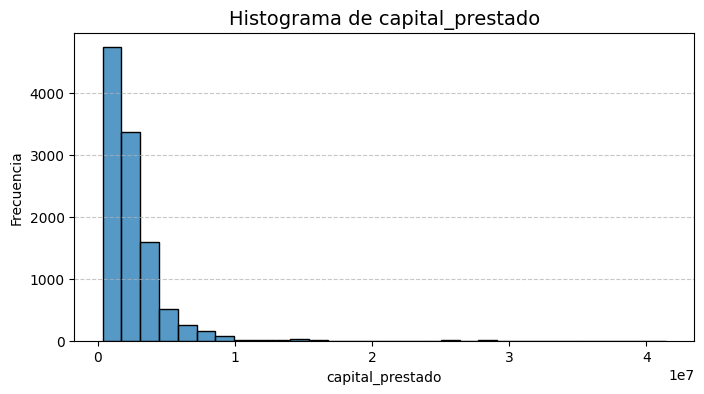

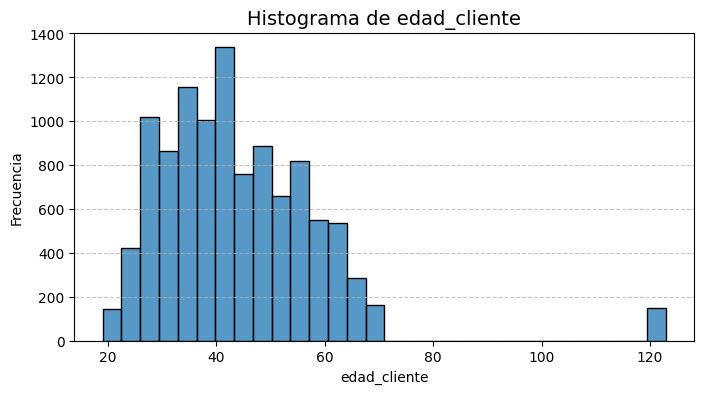

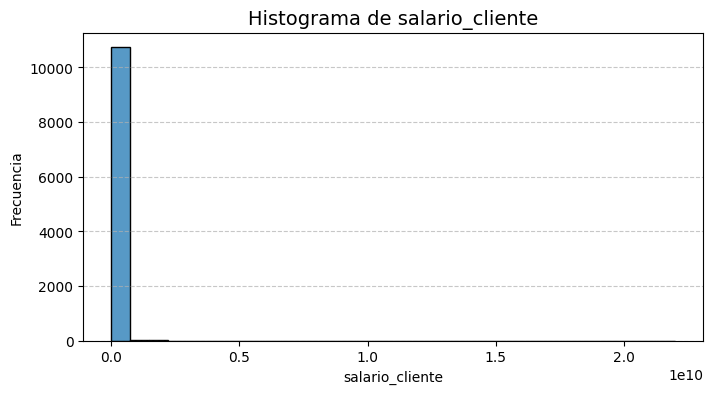

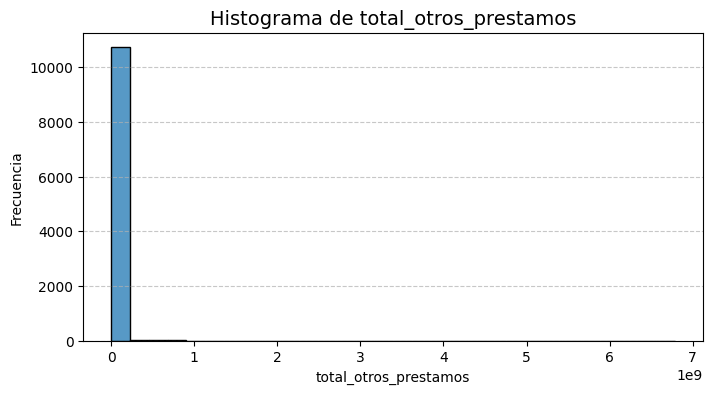

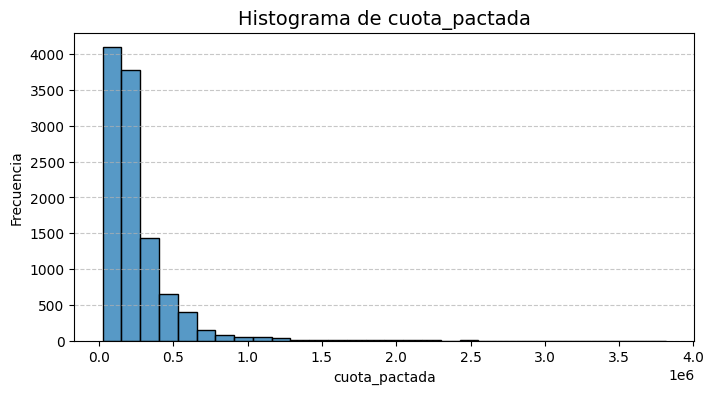

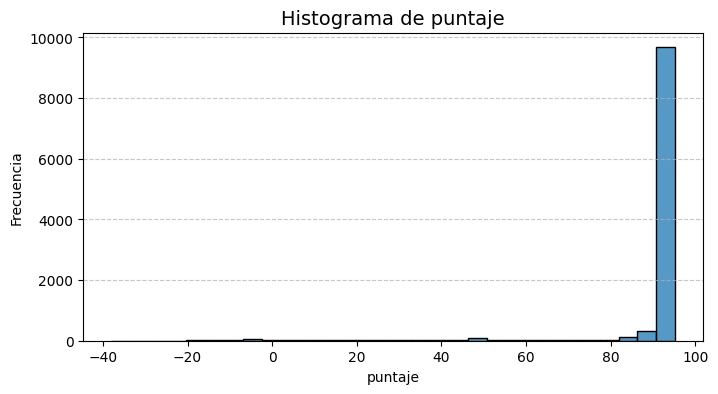

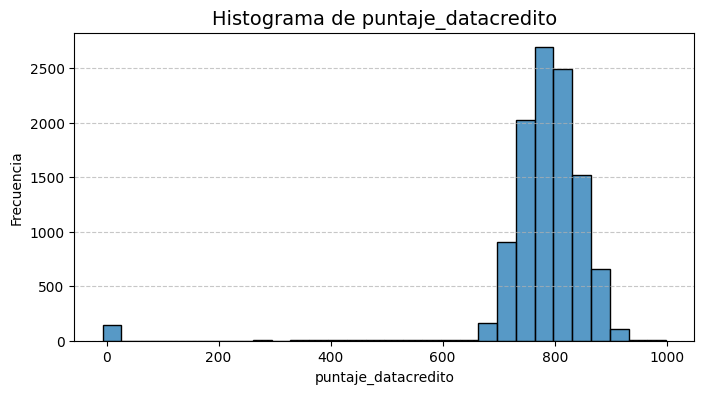

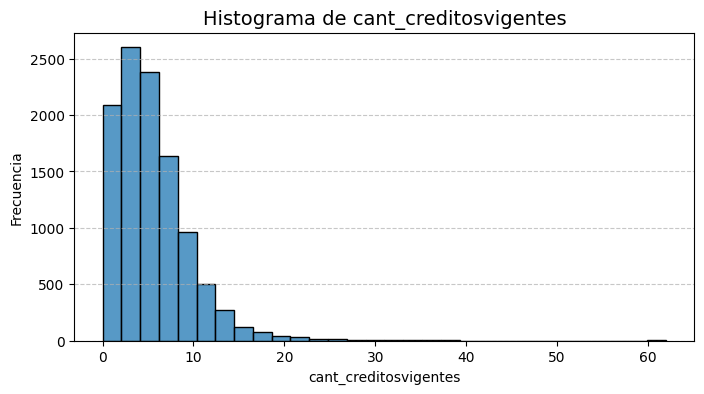

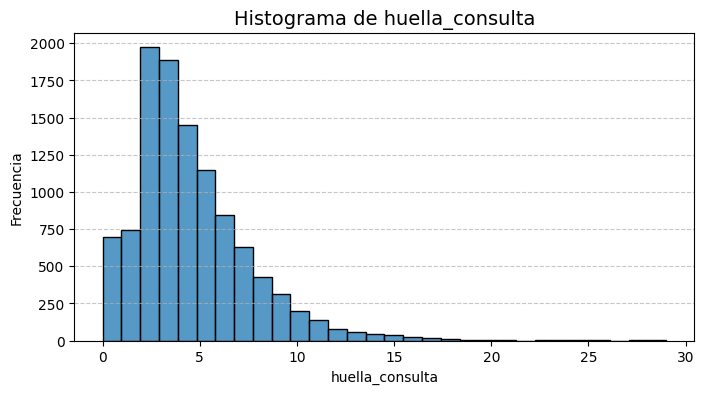

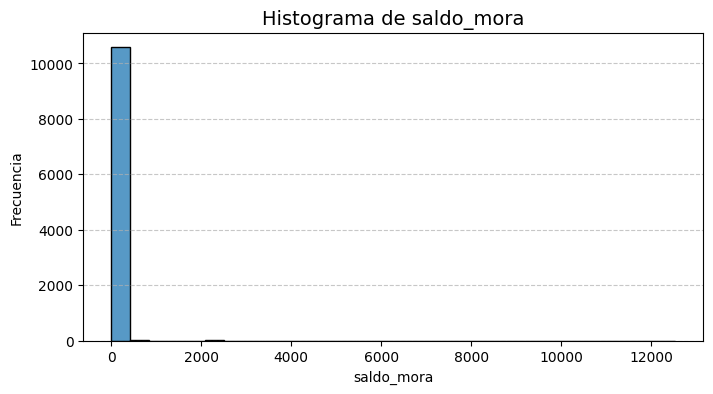

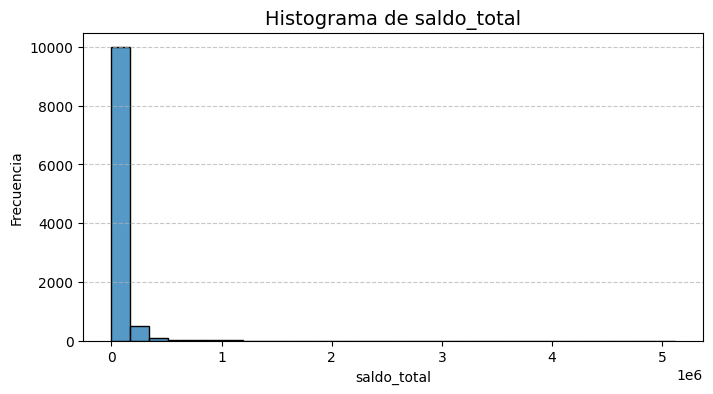

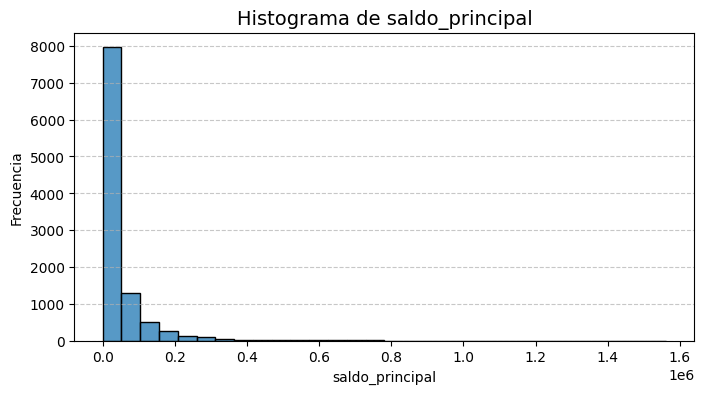

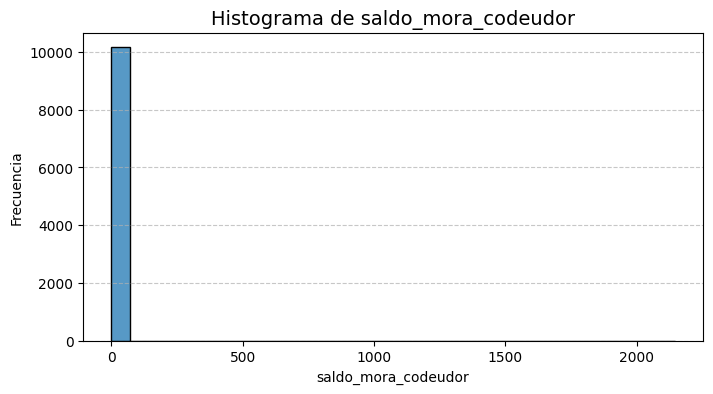

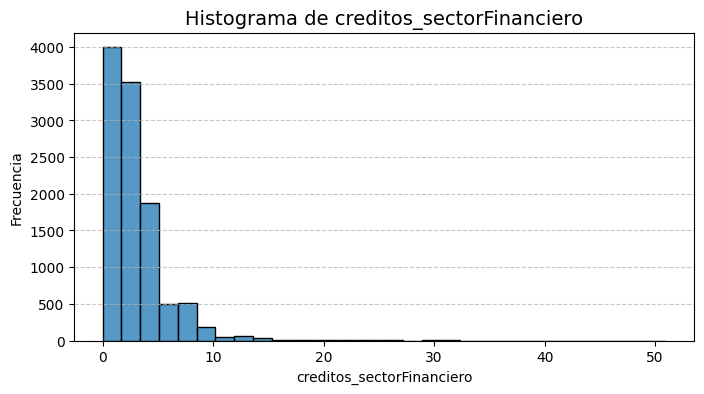

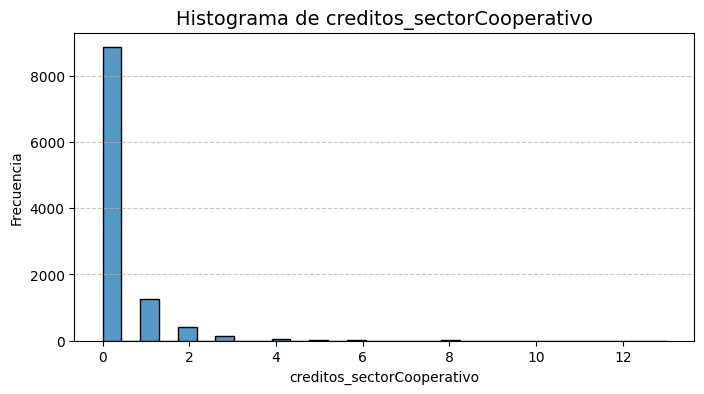

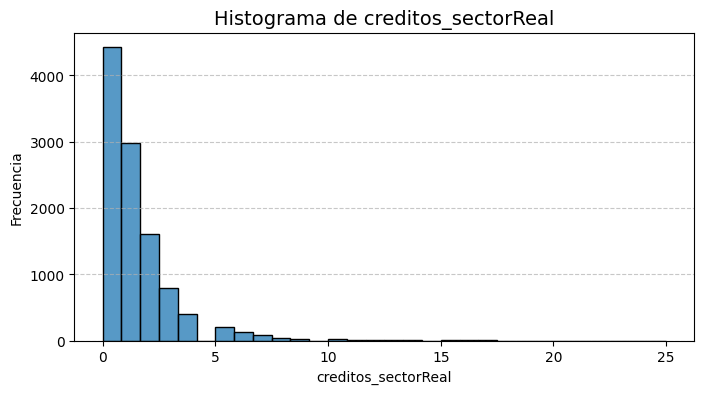

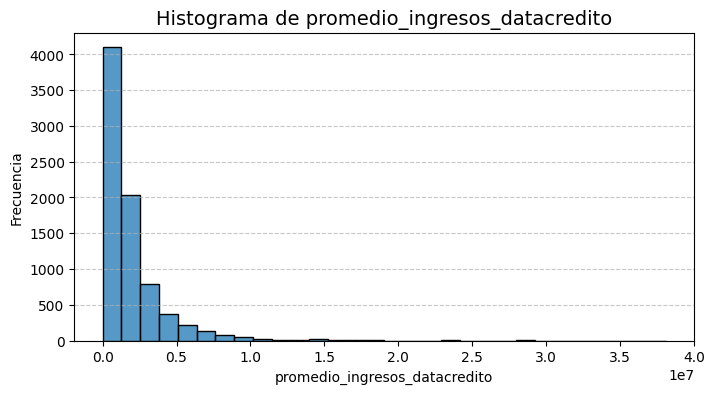

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#   Filtrar solo columnas numericas
num_cols = df.select_dtypes(include=['int64','float64']).columns

#   Recorrer y graficar histogramas
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), bins=30)
    plt.title(f"Histograma de {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

Capital Prestado: Distribucion sesgada hacia la derecha con la mayoria de prestamos concentrados en valores bajos. Presencia de outliers sugiere diferentes segmentos de clientes

Plazo meses: Distribucion relativamengte uniforme con concentracion de plazos estandar (12, 23, 36 meses). En terminos de cumplimieto, loscreditos de corto plazo son mas confiables, y el riesgo aumenta en mediano y largo plazo.

Edad Cliente: Distribucion normal con ligero sesgo hacia edades mayores. Concentracion princial entre 30-50 años, tipico de poblacion creiticiamente activa.

Salario Cliente: Fuerte concentracion en salarios bajos con cola larga hacia valores altos. Patron tipico de distribucion de ingresos en poblacion general.

Total Otros Prestamos: Mayoria de clientes sin otros prestamos, con casos aislados de exposiciones multiples muy altas. Sugiere portafolio principalmente de primeros creditos.

Puntaje: Altamente concentrado en puntajes entre 80-100.

Puntaje Datacreidito: Similar al puntaje anterior con mayor concentracion en 800.

Cantidad Creditos Vigentes: Fuerte concentracion entre 0-10. Pocos clientes con multiples exposiciones, indicando gestion conservadora de riesgo.

Huella Consulta: Distribucion sesgada hacia la derecha alta concentracion de personas entre 0 - 5. 

Saldo Mora: Mayoria de clientes sin mora (valores en cero), con casos aislados de moras significativas.

Saldo Total: Gran variabilidad con mediana muy inferior a la medida, confirmando concentracion en saldos bajos con outliers extremos.

Saldo Principal: Patron similar al saldo total

Saldo Mora Codeudor: Mayoria absoluta en cero, indicando baja utilizacion de codeudores y/o buen comportamiento de pago conjunto.

Creditos Sector Financiero: Distribucion concentrada en valores bajos, con mayoria de clientes teniendo pocos o ningun credito en sector financiero

Creditos Sectos Cooperativo: Similar al sector financiero, concentracion en valores bajos sugiriendo baja penetracion del secto cooperativo.

Estadisticas Creditos Sector Real: Baja exposicion promedio en sector real, consistente con el perfil de cartera observado.

Promedio Ingreso Datacredito: Distribucion sesgada similar al salrio cliente.



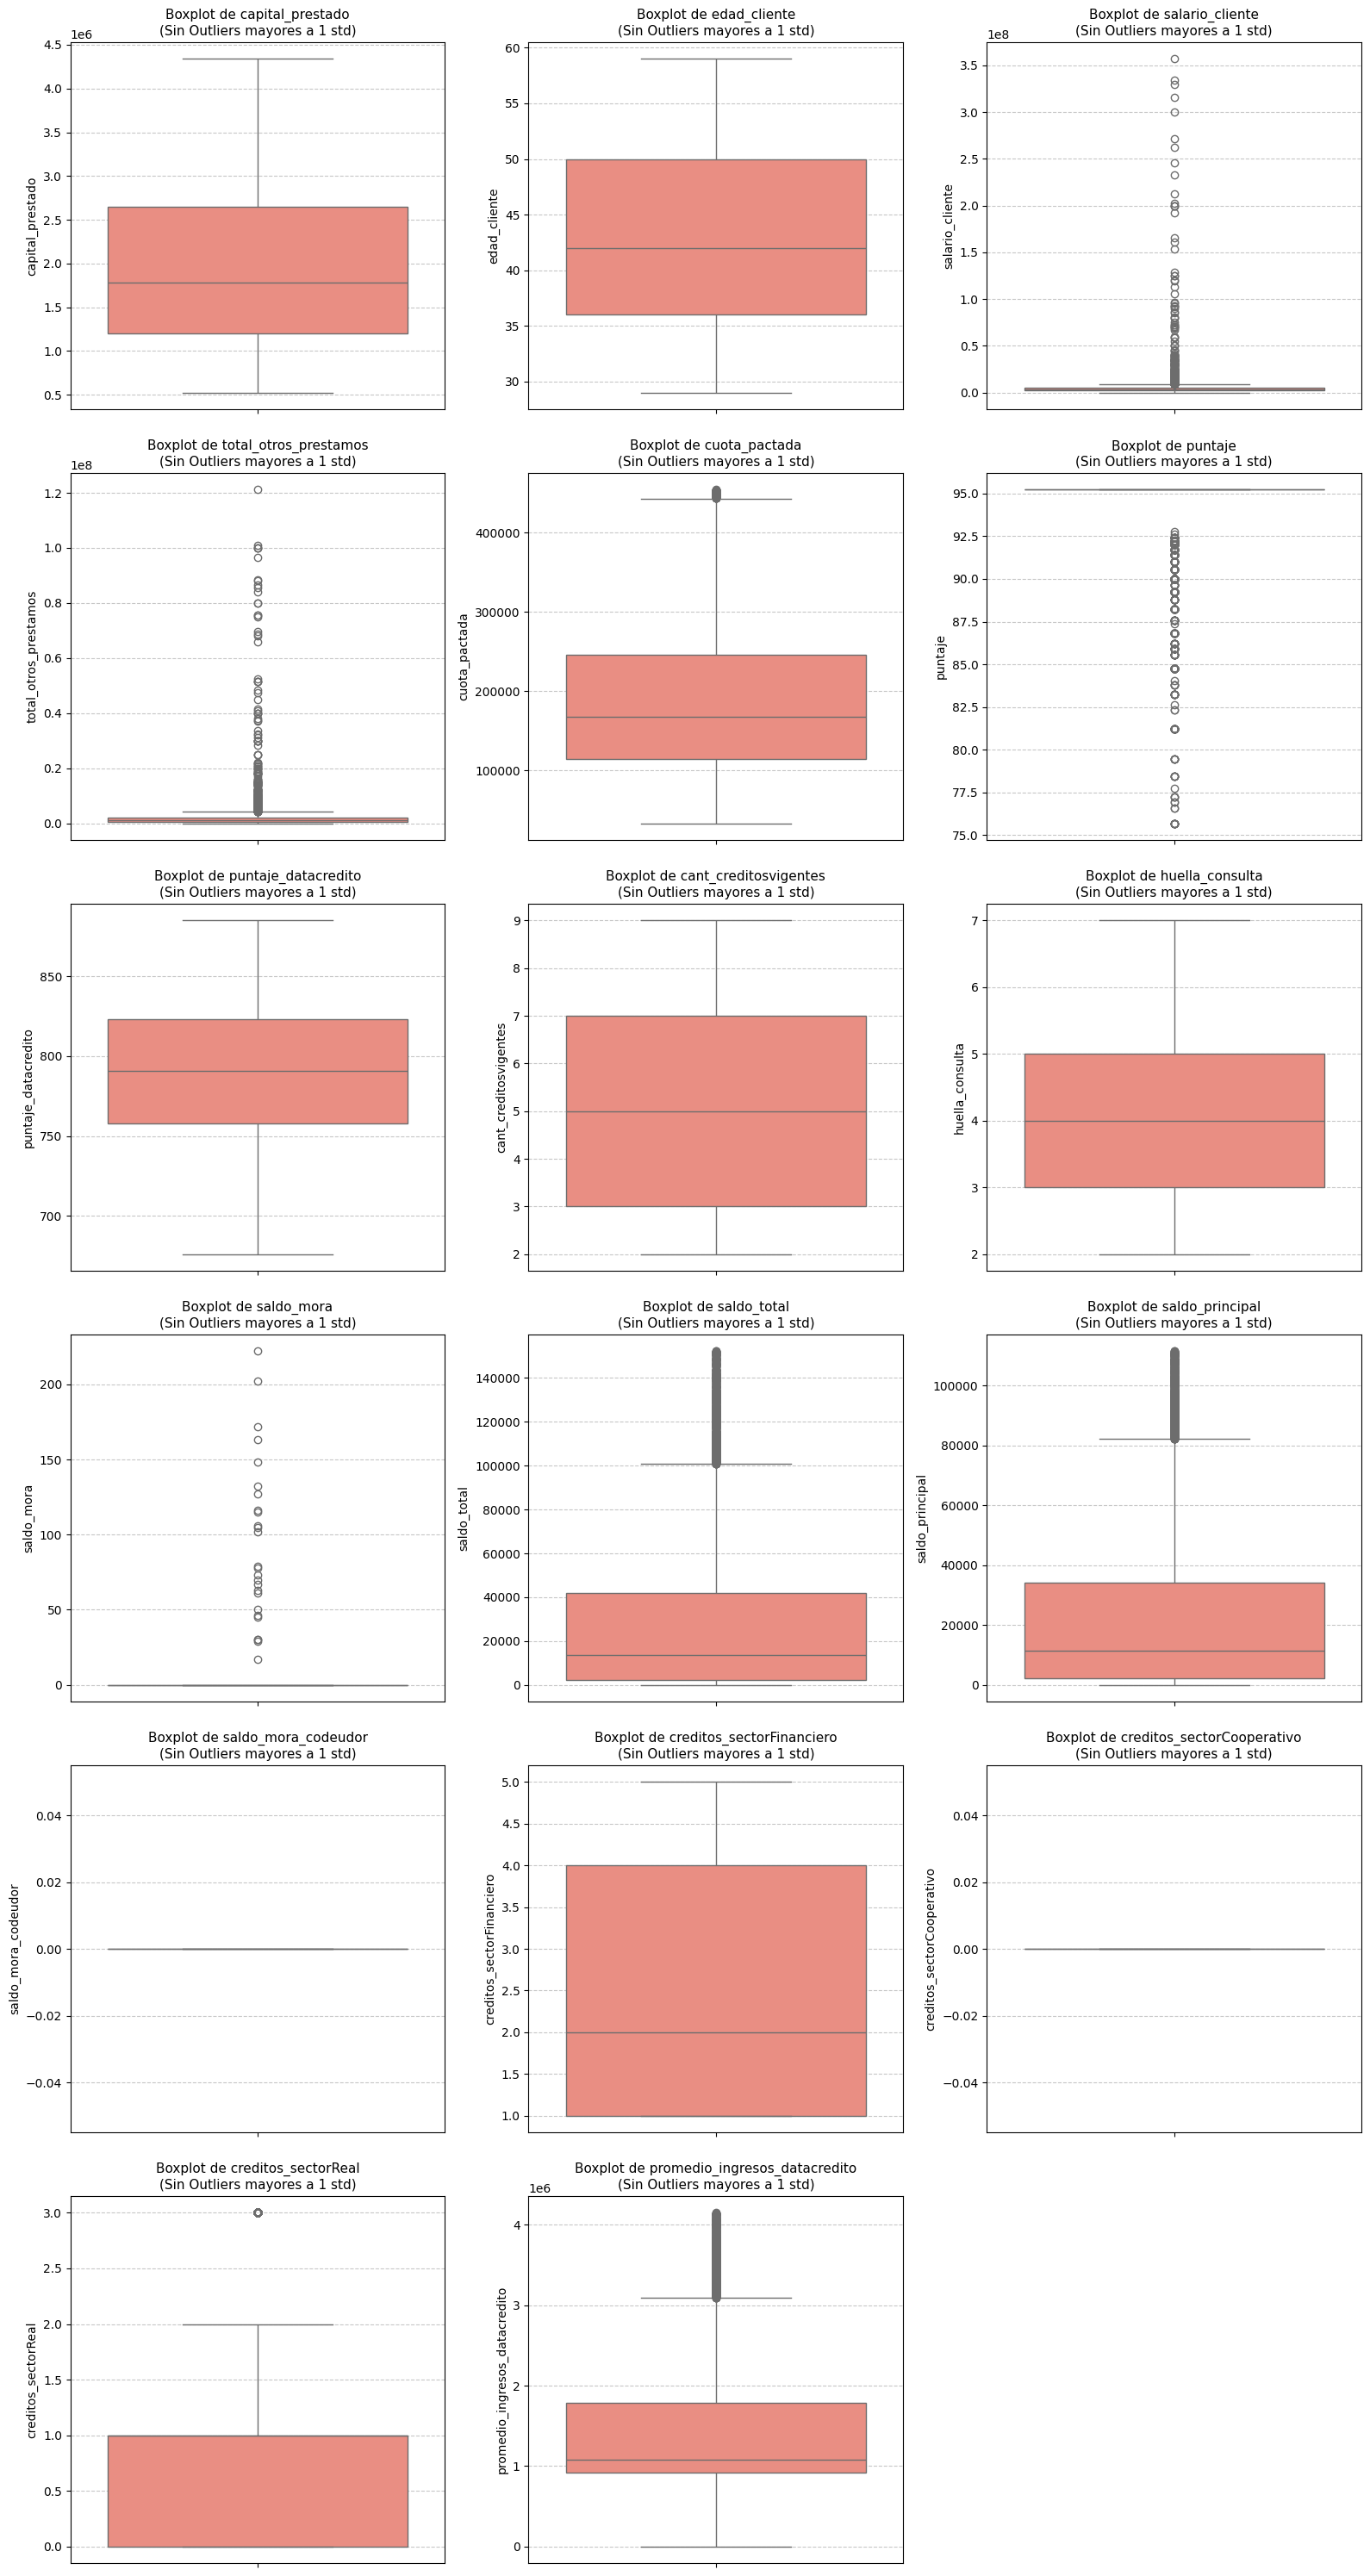

In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo columnas numericas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Configuración de la cuadrícula: máximo 3 columnas
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

# Crear la figura y los ejes (subplots) con un tamaño proporcional a las filas
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 5 * n_rows))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar con un índice

# Definir el multiplicador de la desviación estándar (X distancia de la media)
umbral_z  =1 

# Recorrer las columnas y graficar Boxplots
for i, col in enumerate(num_cols):
    col_data = df[col].dropna()
    mean = col_data.mean()
    std = col_data.std()
    
    # Filtrar datos que estén dentro del umbral (mean ± umbral_z * std)
    filtered_data = col_data[np.abs(col_data - mean) <= umbral_z * std]
    
    # Asignar a 'y' para que el boxplot quede vertical (parado)
    sns.boxplot(y=filtered_data, ax=axes[i], color='salmon')

    # Indicar en el título que no se tienen en cuenta outliers
    axes[i].set_title(f"Boxplot de {col}\n(Sin Outliers mayores a {umbral_z} std)", fontsize=11)
    axes[i].set_ylabel(col)
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

# Si el número de variables numéricas no es múltiplo de 3, ocultamos los vacíos
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño
plt.tight_layout()
# plt.show()


### Boxplot Capital Prestado
*   Mediana muy baja (~500K) con Q3 de 2M, indicando que 75% de los prestamos son de monto pequeño-mediano. Outliers extremos hasta 50M+ sugieren prestamos corporativos o hipotecarios. La caja compacta confirma concentracion en segmentos retail.

### Boxplot Edad Cliente
*   Distribucion simetrica con mediana ~40 años. Ranfo inrcuartilico normal (30-50 años) sin outliers extremos, confirmando poblacion crediticia estandar. Los whiskers se extienden apropiadamente hasta los limites naturales de edad crediticia.

### Boxplot Salario Cliente
*   Mediana baja (~2M) con Q3 alrededor de 4M, mostrando concentracion en ingresos medios-bajos. Outliers extremos hasta 50M+ indican ejecutivos o empresarios. La asimetria hacia arriba es tipica de distribuciones de ingreso.

### Boxplot Total Otros Prestamos
*   Mediana en cero confirma que mayoria de clientes no tienen otros prestamos. Q3 bajo indica que incluso al 75% superior tiene exposiciones limitadas. Outliers significativos sugieren clientes con multiples obligaciones financieras.

### Boxplot Couta Pactada
*   Mediana baja (~200K) consistente con ingresos y montos prestados observados. La proporcion couta/ingreso implicita parece conservadora. Outliers extremos corresponden a los prestamos de mayor monto identificados previamente.

### Boxplot Cantidad Creditos Vigentes
*   Mediana en 1-2 creditos con Q3 alrededor de 3, indicando gestion conservadora de exposicion multiple. Pocos outliers con muchos creditos sugieren casos especiales o clientes premium con mayor capacidad de endeudamiento.

### Boxplot Saldos (Variables multiples)
*    Todos muestran patron similar: medianas bajas, alta concentracion de calores pequeños y outliers extremos. Confirma que el portafolio esta dominado por creditos pequeños con casos aislados de exposiciones significativas.

In [17]:
print("\n--- Cumplimiento por Tipo Laboral y Tipo de Crédito ---")
tabla_credito = pd.crosstab([df["tipo_laboral"], df["tipo_credito"]], df["Pago_atiempo"], normalize="index") * 100
# Renombramos las columnas 0 y 1 para que sea legible
tabla_credito.columns = ["Mora (0)", "Pagó (1)"] 
# Quitamos el nombre del índice de columnas para limpiar la vista
tabla_credito.columns.name = None 
print(tabla_credito.to_string(float_format="%.2f%%"))


print("\n--- Cumplimiento por Tendencia de Ingresos y Tipo Laboral ---")
tabla_ingresos = pd.crosstab([df["tendencia_ingresos"], df["tipo_laboral"]], df["Pago_atiempo"], normalize="index") * 100
# Renombramos y limpiamos igual
tabla_ingresos.columns = ["Mora (0)", "Pagó (1)"]
tabla_ingresos.columns.name = None
print(tabla_ingresos.to_string(float_format="%.2f%%"))



--- Cumplimiento por Tipo Laboral y Tipo de Crédito ---
                            Mora (0)  Pagó (1)
tipo_laboral  tipo_credito                    
Empleado      4                4.14%    95.86%
              6               42.86%    57.14%
              9                4.36%    95.64%
              10               2.67%    97.33%
Independiente 4                5.71%    94.29%
              9                5.19%    94.81%
              10               2.44%    97.56%

--- Cumplimiento por Tendencia de Ingresos y Tipo Laboral ---
                                  Mora (0)  Pagó (1)
tendencia_ingresos tipo_laboral                     
Creciente          Empleado          3.57%    96.43%
                   Independiente     4.82%    95.18%
Decreciente        Empleado          5.87%    94.13%
                   Independiente     7.34%    92.66%
Estable            Empleado          4.49%    95.51%
                   Independiente     4.81%    95.19%


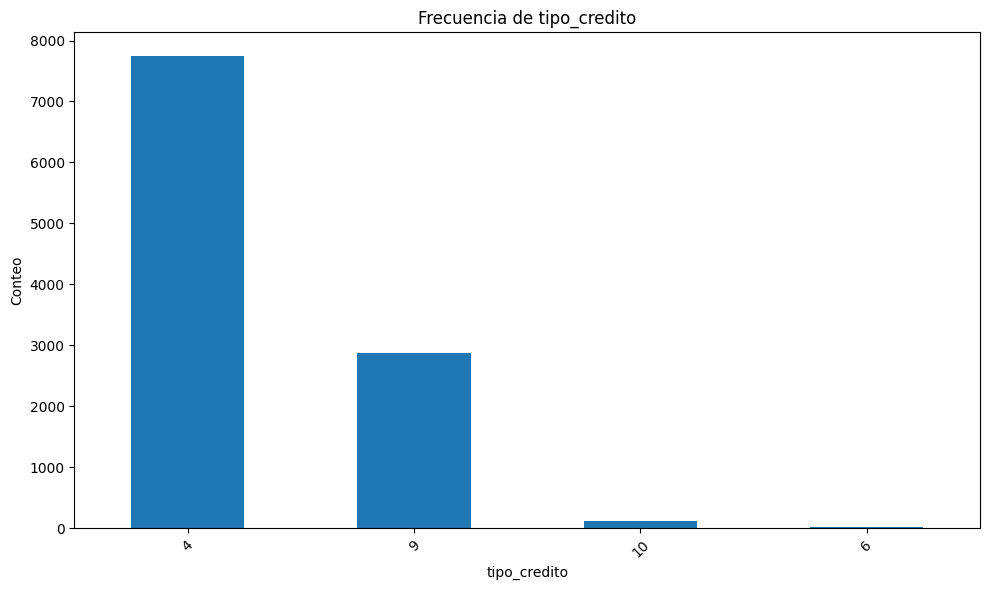

Values counts for tipo_credito:
tipo_credito
4     7747
9     2876
10     116
6       21
Name: count, dtype: int64

--------------------------------------------------


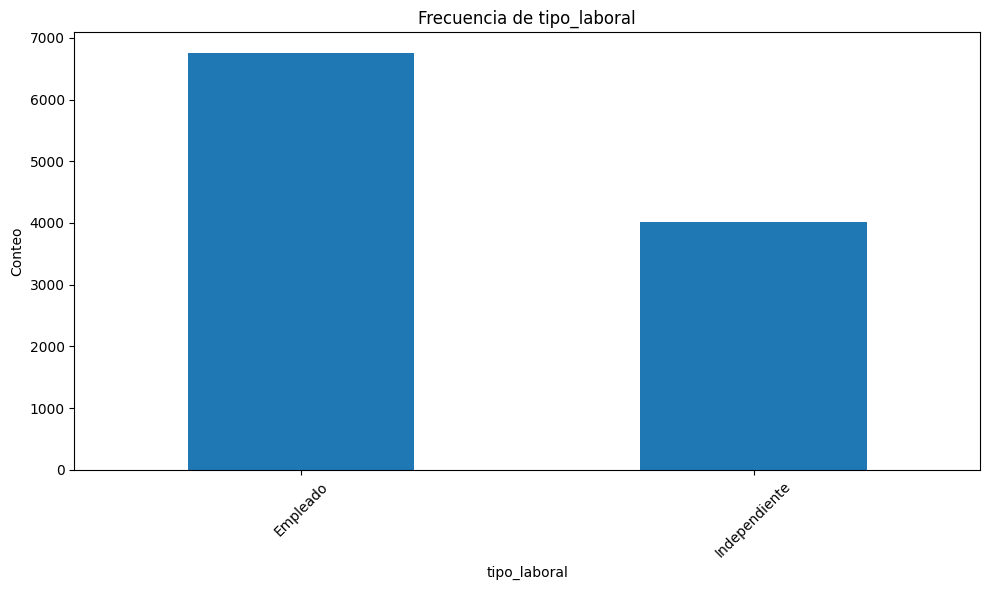

Values counts for tipo_laboral:
tipo_laboral
Empleado         6752
Independiente    4008
Name: count, dtype: int64

--------------------------------------------------


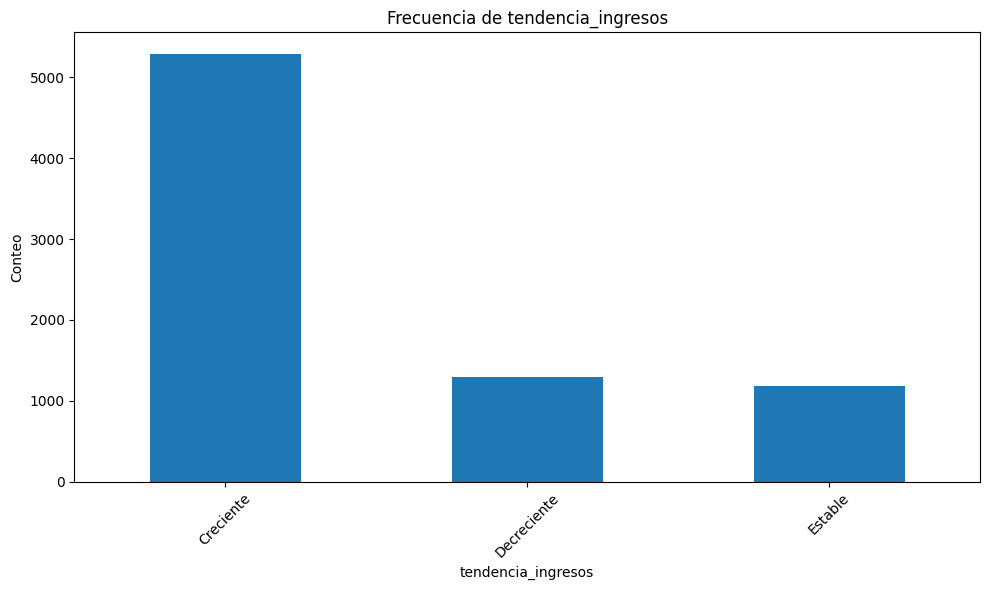

Values counts for tendencia_ingresos:
tendencia_ingresos
Creciente      5293
Decreciente    1291
Estable        1187
Name: count, dtype: int64

--------------------------------------------------


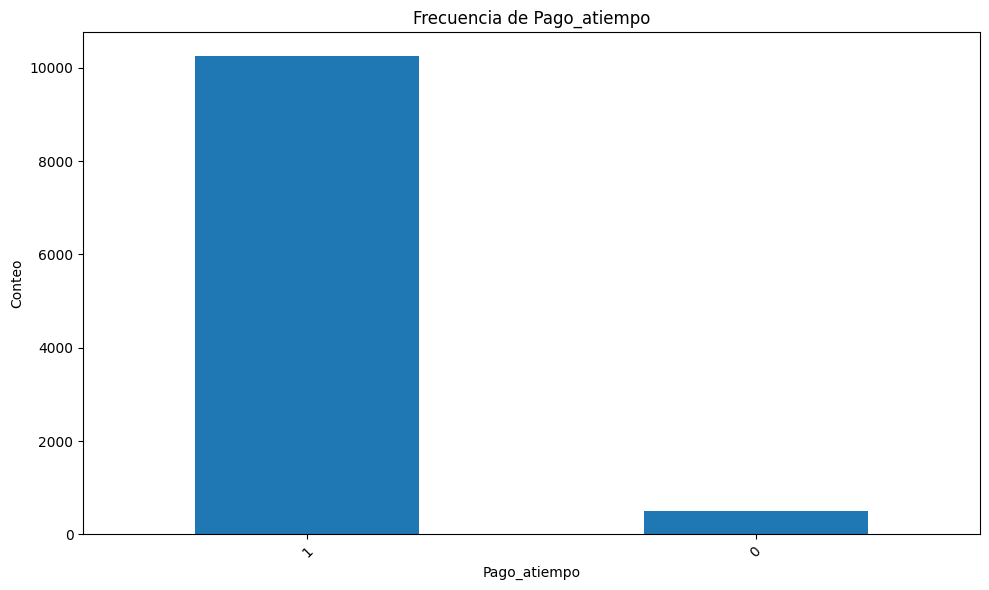

Values counts for Pago_atiempo:
Pago_atiempo
1    10249
0      511
Name: count, dtype: int64

--------------------------------------------------


In [18]:
# Buscar columnas categoricas directamente
categorical_cols = df.select_dtypes(include=["object", "category", "bool"]).columns

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Frecuencia de {col}")
    plt.xlabel(col)
    plt.ylabel("Conteo")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print(f"Values counts for {col}:\n{df[col].value_counts()}\n")
    print("-" * 50)

### Tipo credito
*   Existe una categoria claramente dominante (probablemente consumo o libre inversion).
*   Las demas categorias aparecen en proporciones mucho menores.
*   Esto podria generar desbalance en las clases y requerir tecnicas de balaceo o agrupacion.

### Tipo Laboral
*   Mayoria de clientes son empleados, mientras que los independientes representan a un grupo menor.
*   Podria ser relevante porque los independientes suelen tener mayor probabilidad de incumplimiento.

### Analisis bivariable

Nos interesa revisar cada variable respecto a la objetivo. Para las variables numericas boxplot como hue o columna la variable objetivo. Hisplot con hue=columna objetivo

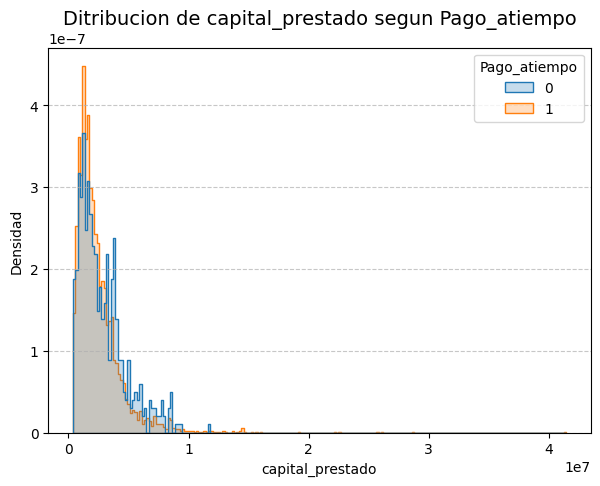

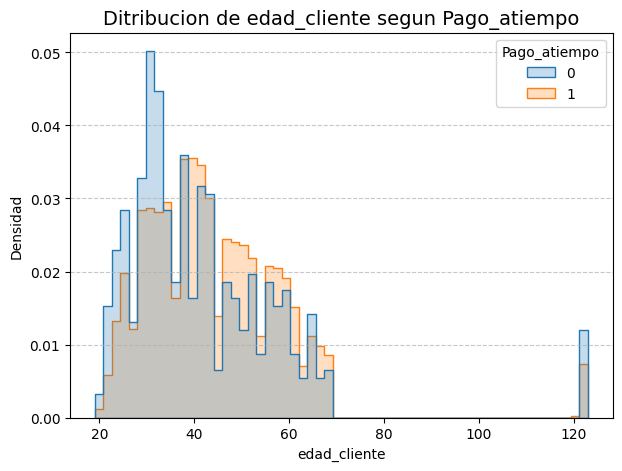

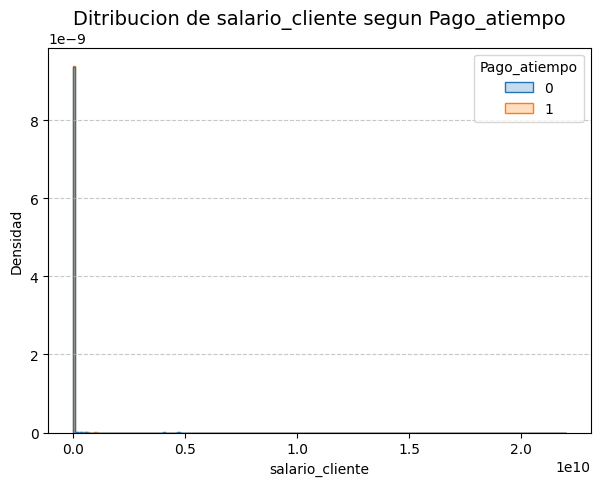

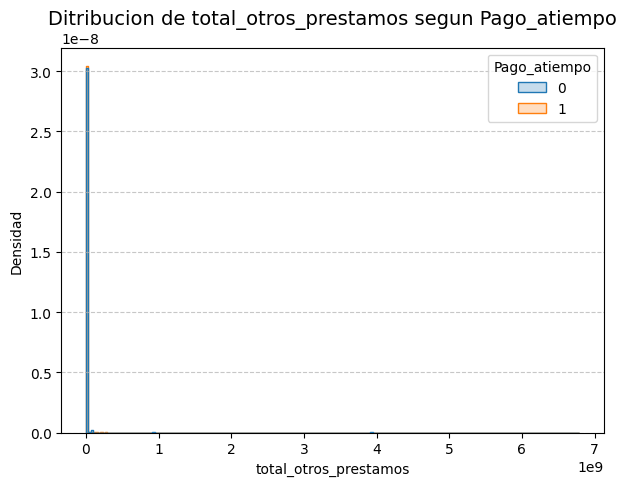

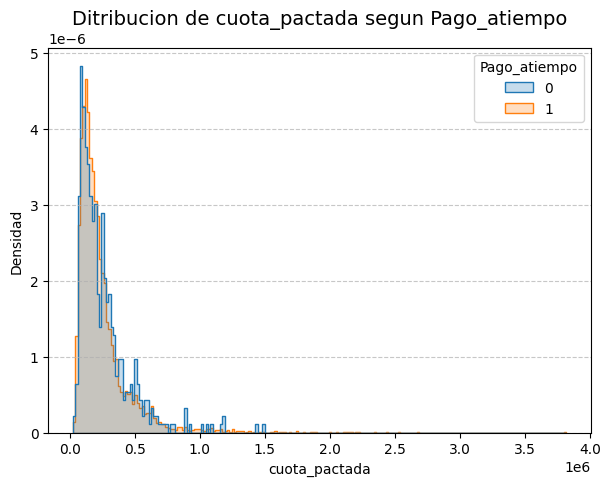

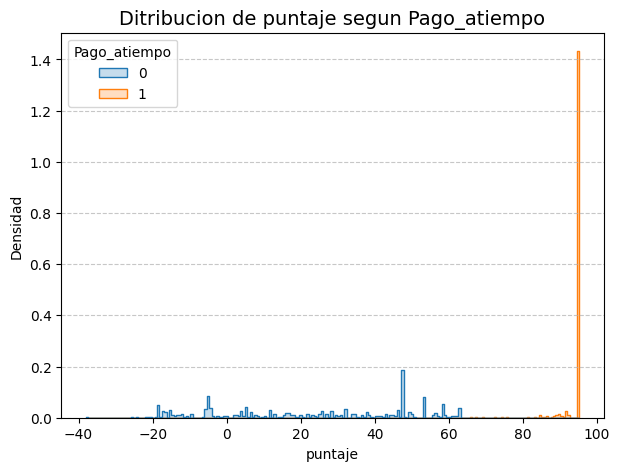

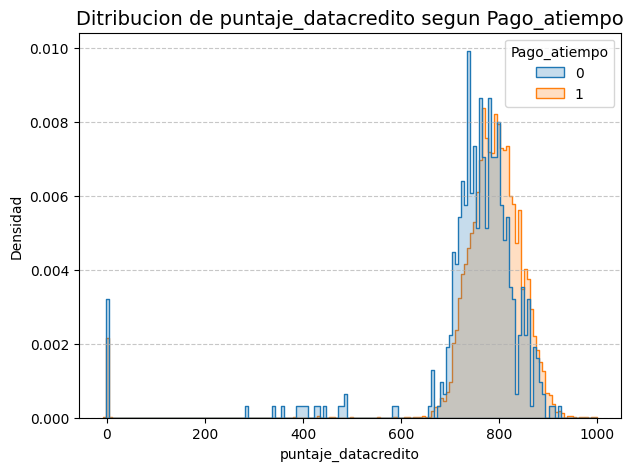

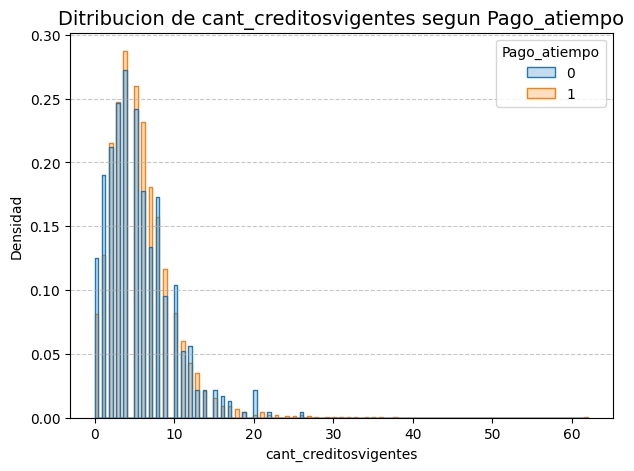

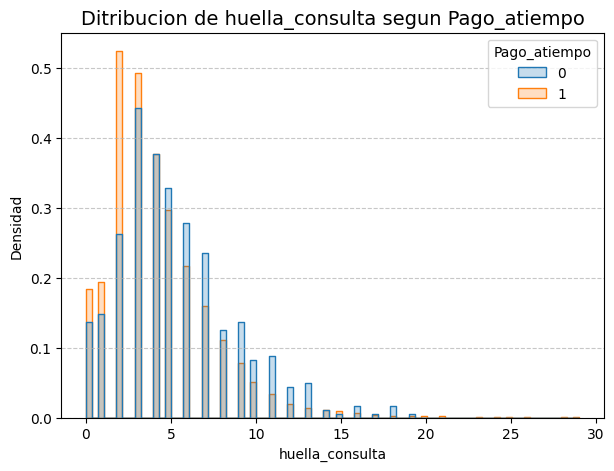

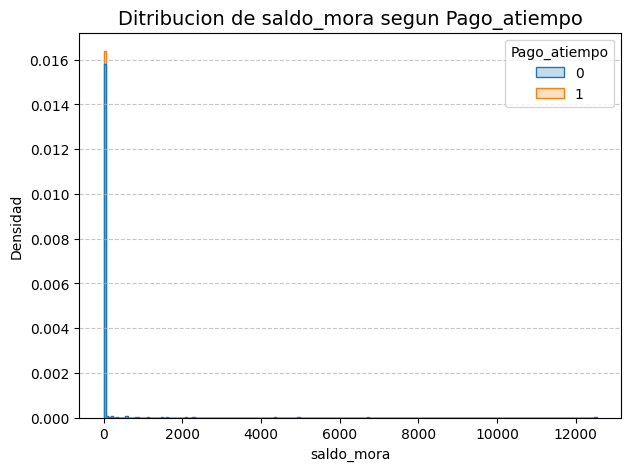

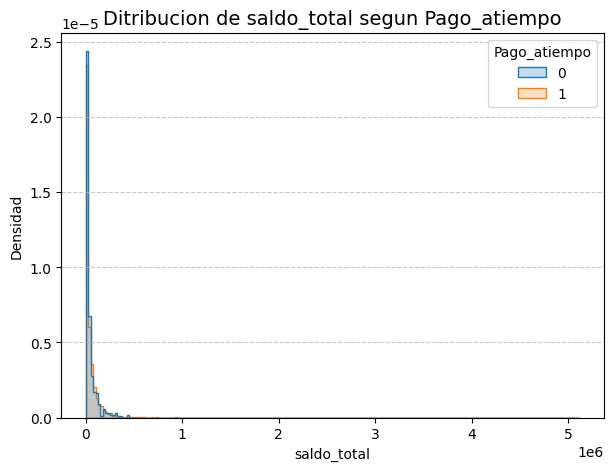

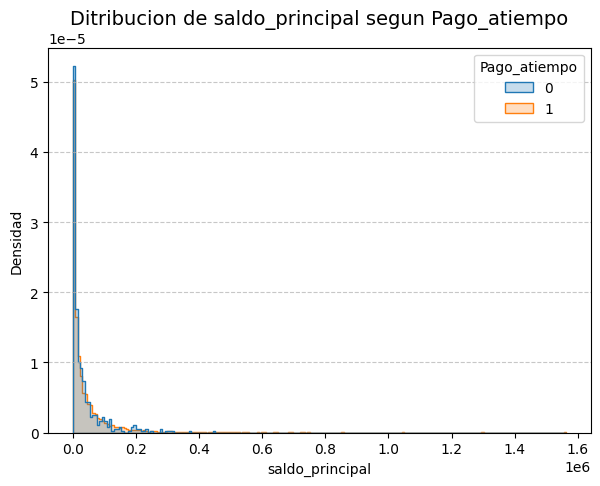

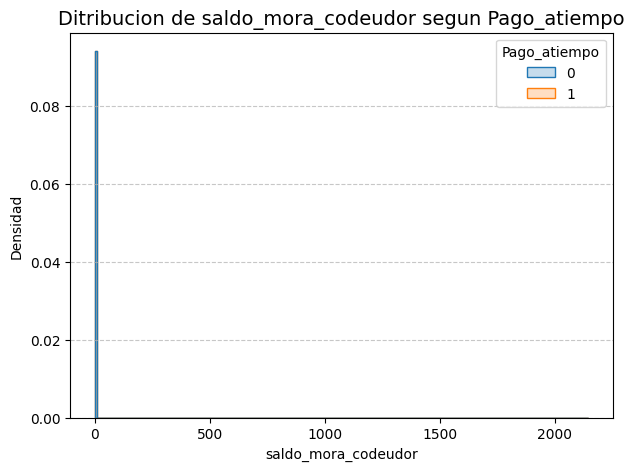

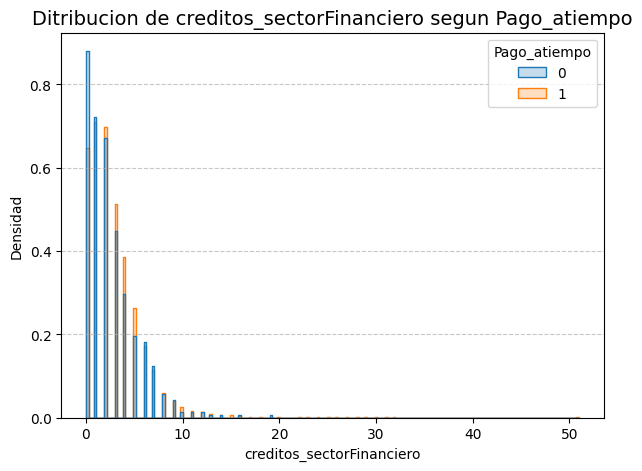

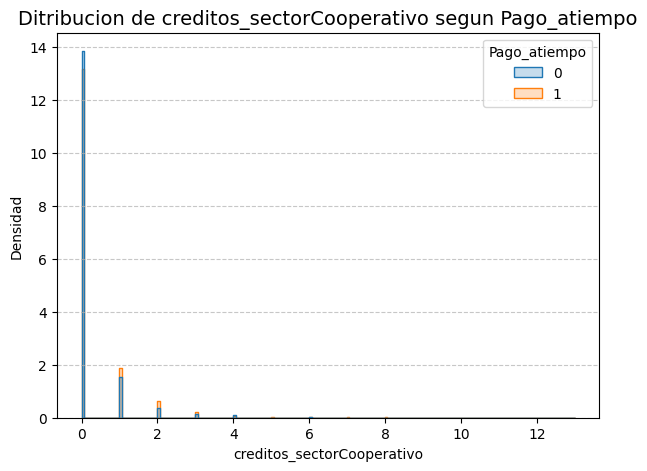

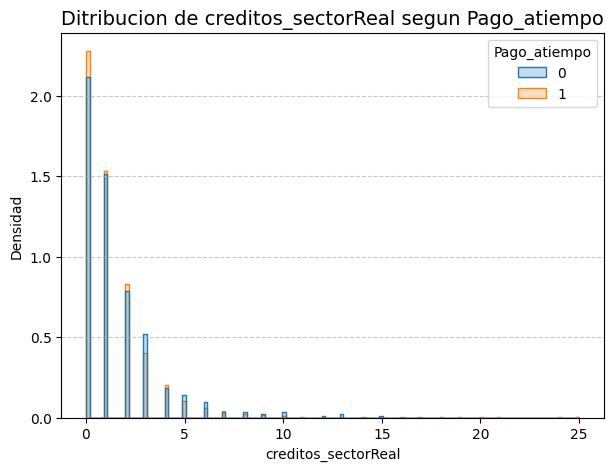

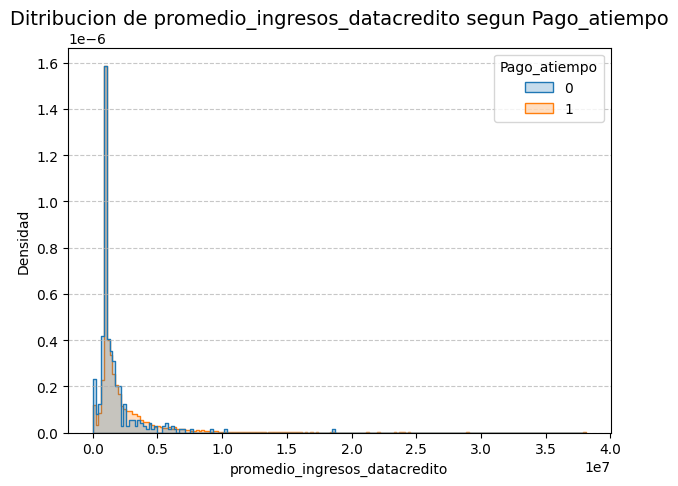

In [19]:
# Variables numericas
num_cols =df.select_dtypes(include=["int64", "float64"])

for col in num_cols:
    plt.figure(figsize=(7, 5))
    sns.histplot(data=df, x=col, hue="Pago_atiempo", element="step", stat="density", common_norm=False)
    plt.title(f"Ditribucion de {col} segun Pago_atiempo", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Densidad")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

### Capital Prestado vs Pago a Tiempo: 
*   Los clientes que no pagan a tiempo tienden a tener prestamos de montos mas altos. La distribucion muestra mayor dispersion en el grupo de no pagadores, sugiriendo que montos elevados aumentan el riesgo de incumplimiento
### Plazo Meses vs Pago a Tiempo:
*   Los buenos pagadores se concentran en plazos medios (12-36 meses), mientras que los malos pagadores muestran variabilidad. Plazos muy largos parecen asociarse con mayor riesgo de incumplimiento
### Edad Cliente vs Pago a Tiempo:
*   Diferencia notable: clientes que pagan a tiempo tienden a ser mayores (concentracion 35-50 años). Los mas jovenes muestran mayor propension al incumplimiento, confirmando edad como factor de riesgo.
### Salario Cliente vs Pago a Tiempo:
*   Los buenos pagadores muestran distribucion mas concentrada en ingresos medios-altos. Los malos pagadores tienen mayor dispersion, incluyendo casos de ingresos altos que no pagan, sugiriendo otros factores de riesgo.
### Total Otros Prestamos vs Pago a Tiempo:
* Clara diferenciacion: malos pagadores tienen significativamente mas exposicion en otros prestamos. Alta correlacion entre sobreendeudamiento y riesgo de incumplimiento.
### Couta pactada vs Pago a Tiempo:
*   Los buenos pagadores se concentran en coutas bajas-medias. Coutas muy altas se asoscian con mayor riesgo, probablemente por compromiso excesivo de la capacidad de pago.

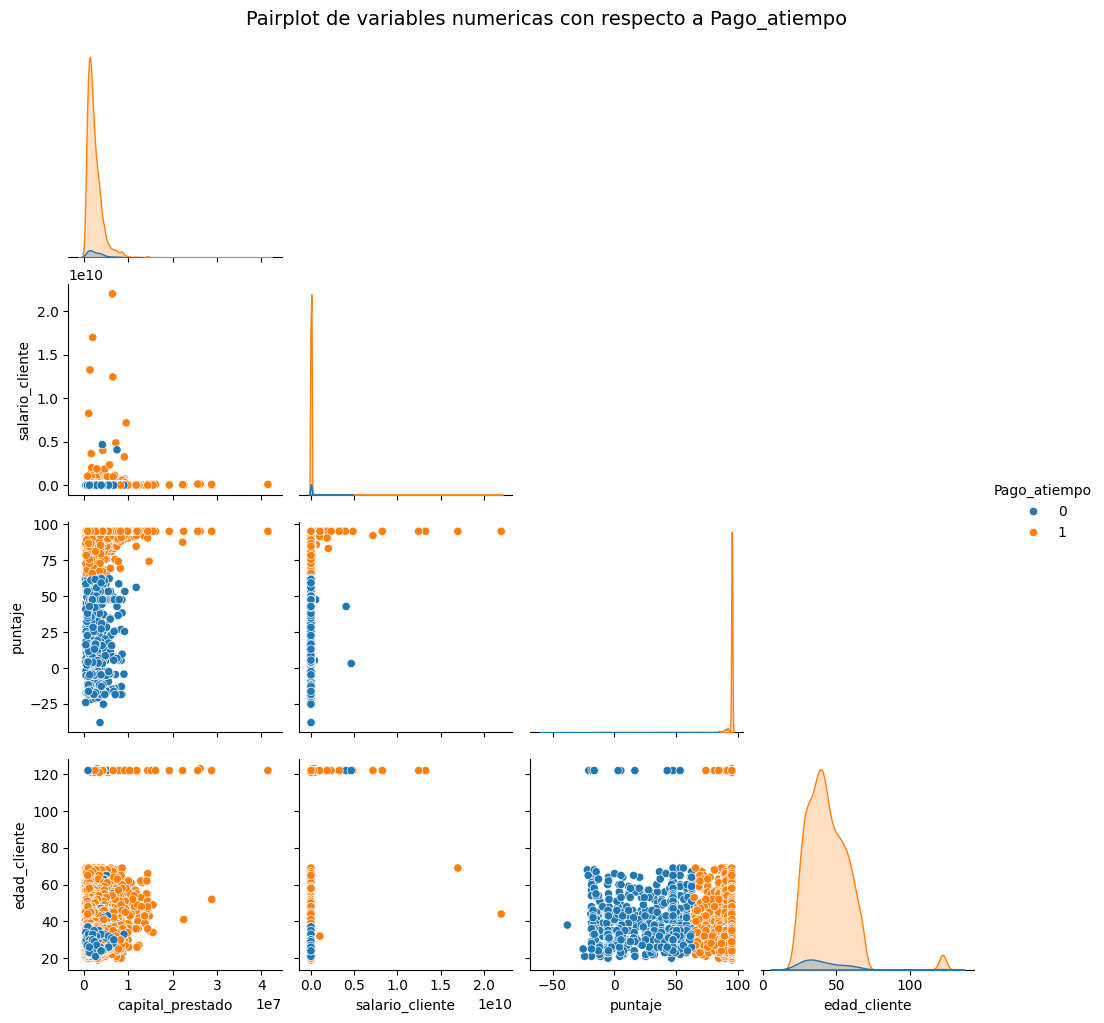

In [20]:
sns.pairplot(df, vars=["capital_prestado", "salario_cliente", "puntaje", "edad_cliente"], 
             hue="Pago_atiempo", diag_kind="kde", corner=True)
plt.suptitle("Pairplot de variables numericas con respecto a Pago_atiempo", y=1.02, fontsize=14)
plt.show()

##  ANÁLISIS DE VARIABLE OBJETIVO (Pago_atiempo)

###  ¿Qué analizamos?
- **Distribución de clases**: Balance entre pagos a tiempo vs no pagos
- **Porcentajes**: Proporción de cada clase
- **Visualización**: Gráfico de barras para entender el balance

###  Importancia para el modelo:
- **Desbalance de clases**: Afecta la elección de métricas (accuracy vs F1-score)
- **Sampling strategy**: Puede requerir técnicas de balanceo (SMOTE, undersampling)
- **Threshold selection**: Influencia en el punto de corte del modelo

### Interpretación:
- **0**: No paga a tiempo (malo)
- **1**: Paga a tiempo (bueno)
- **Ideal**: Balance 50-50 o cercano
- **Problema**: Si hay mucho desbalance (>80-20)

📊 ANÁLISIS DE VARIABLE OBJETIVO (Pago_atiempo)

1️⃣ DISTRIBUCIÓN DE CLASES:


,Cantidad,Porcentaje
Pago_atiempo,,
No Paga (0),511,4.75
Paga (1),10252,95.25



2️⃣ EVALUACIÓN DE BALANCE:
   • Ratio de balance: 20.06:1
   • Clase mayoritaria: 95.3%
   • Nivel de balance: 🔴 Alto desbalance
   • Recomendación: Requerido balanceo (SMOTE, undersampling, class weights)

3️⃣ VISUALIZACIÓN:


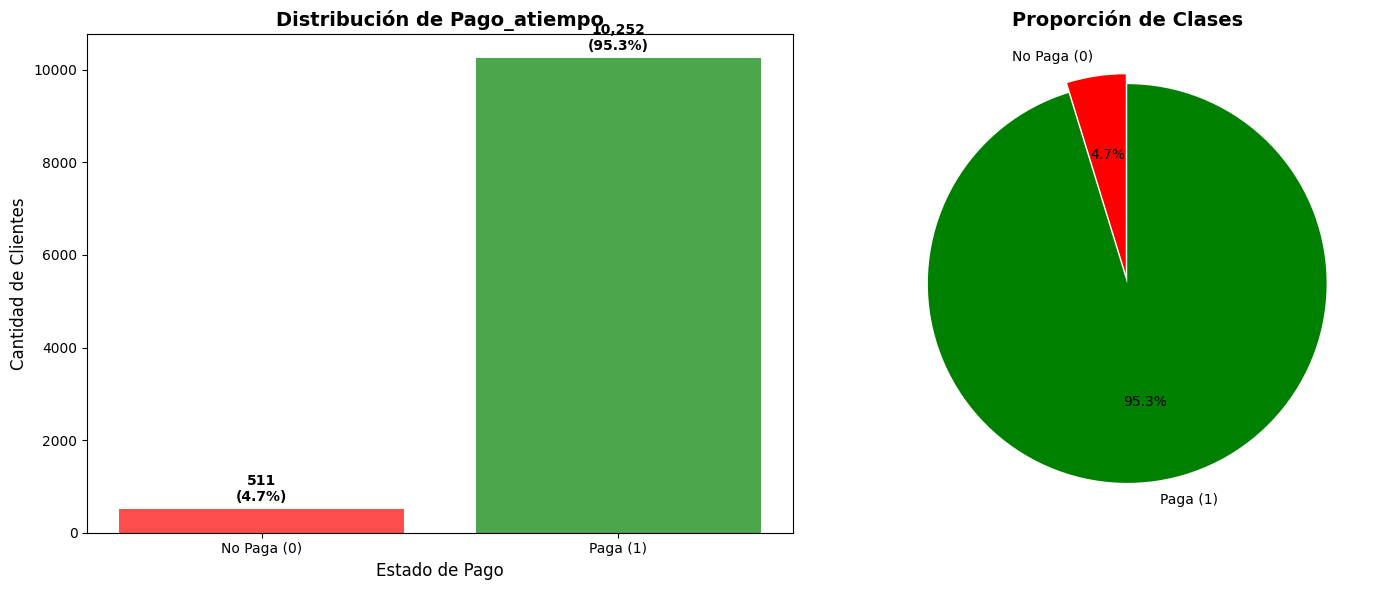


4️⃣ IMPLICACIONES PARA EL MODELADO:
   • Métrica principal recomendada: F1-Score
   • Estrategia de validación: Stratified K-Fold
   • Técnicas de balanceo: SMOTE/Class Weights

✅ Análisis de variable objetivo completado
📊 Información guardada para uso en ft_engineering.py


In [65]:
# 🎯 ANÁLISIS DE VARIABLE OBJETIVO
# ================================

print("📊 ANÁLISIS DE VARIABLE OBJETIVO (Pago_atiempo)")
print("=" * 60)

# Verificar que existe la variable objetivo
if 'Pago_atiempo' not in df.columns:
    print("❌ ERROR: No se encuentra la variable 'Pago_atiempo'")
    print("🔍 Verifica que el dataset contenga esta columna")
else:
    # 1. Análisis de distribución
    print("\n1️⃣ DISTRIBUCIÓN DE CLASES:")
    conteo_clases = df['Pago_atiempo'].value_counts().sort_index()
    porcentaje_clases = df['Pago_atiempo'].value_counts(normalize=True).sort_index() * 100
    
    # Crear tabla de resultados
    resultados_target = pd.DataFrame({
        'Cantidad': conteo_clases,
        'Porcentaje': porcentaje_clases.round(2)
    })
    
    # Mapear valores a etiquetas
    resultados_target.index = resultados_target.index.map({0: 'No Paga (0)', 1: 'Paga (1)'})
    
    display(resultados_target)
    
    # 2. Evaluar balance de clases
    print("\n2️⃣ EVALUACIÓN DE BALANCE:")
    ratio_balance = max(conteo_clases) / min(conteo_clases)
    porcentaje_mayor = max(porcentaje_clases)
    
    print(f"   • Ratio de balance: {ratio_balance:.2f}:1")
    print(f"   • Clase mayoritaria: {porcentaje_mayor:.1f}%")
    
    # Clasificación del balance
    if ratio_balance <= 1.5:
        nivel_balance = "✅ Excelente balance"
        recomendacion = "No se requiere balanceo"
    elif ratio_balance <= 2.0:
        nivel_balance = "🟡 Buen balance"
        recomendacion = "Considerar métricas adicionales al accuracy"
    elif ratio_balance <= 3.0:
        nivel_balance = "🟠 Moderado desbalance"
        recomendacion = "Recomendado usar F1-score y considerar balanceo ligero"
    else:
        nivel_balance = "🔴 Alto desbalance"
        recomendacion = "Requerido balanceo (SMOTE, undersampling, class weights)"
    
    print(f"   • Nivel de balance: {nivel_balance}")
    print(f"   • Recomendación: {recomendacion}")
    
    # 3. Visualización
    print("\n3️⃣ VISUALIZACIÓN:")
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Gráfico de barras
    colores = ['red', 'green']
    bars = ax1.bar(['No Paga (0)', 'Paga (1)'], conteo_clases.values, color=colores, alpha=0.7)
    ax1.set_title('Distribución de Pago_atiempo', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Cantidad de Clientes', fontsize=12)
    ax1.set_xlabel('Estado de Pago', fontsize=12)
    
    # Añadir valores en las barras
    for bar, valor in zip(bars, conteo_clases.values):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(conteo_clases)*0.01,
                f'{valor:,}\n({porcentaje_clases[conteo_clases.index[conteo_clases.values == valor][0]]:.1f}%)',
                ha='center', va='bottom', fontweight='bold')
    
    # Gráfico de pastel
    wedges, texts, autotexts = ax2.pie(porcentaje_clases.values, 
                                      labels=['No Paga (0)', 'Paga (1)'],
                                      colors=colores,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      explode=(0.05, 0))
    ax2.set_title('Proporción de Clases', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # 4. Implicaciones para el modelado
    print("\n4️⃣ IMPLICACIONES PARA EL MODELADO:")
    print(f"   • Métrica principal recomendada: {'F1-Score' if ratio_balance > 2 else 'Accuracy'}")
    print(f"   • Estrategia de validación: {'Stratified K-Fold' if ratio_balance > 2 else 'Standard K-Fold'}")
    print(f"   • Técnicas de balanceo: {'SMOTE/Class Weights' if ratio_balance > 2 else 'No requerido'}")
    
    # Guardar información para uso posterior
    target_info = {
        'total_samples': len(df),
        'class_counts': conteo_clases.to_dict(),
        'class_percentages': porcentaje_clases.to_dict(),
        'balance_ratio': ratio_balance,
        'is_balanced': ratio_balance <= 2.0
    }
    
    print(f"\n✅ Análisis de variable objetivo completado")
    print(f"📊 Información guardada para uso en ft_engineering.py")

##  ANÁLISIS DE CORRELACIONES

###  ¿Qué analizamos?
- **Matriz de correlación**: Relaciones entre todas las variables numéricas
- **Correlaciones con target**: Variables más predictivas
- **Multicolinealidad**: Variables redundantes que pueden afectar al modelo

###  Importancia para el modelo:
- **Feature selection**: Variables con alta correlación con el target son buenas candidatas
- **Multicolinealidad**: Variables muy correlacionadas entre sí pueden causar inestabilidad
- **Modelos lineales**: Especialmente sensibles a la multicolinealidad
- **Modelos de árbol**: Menos afectados pero aún relevante para interpretación

###  Interpretación:
- **|r| > 0.7**: Correlación fuerte (preocuparse por multicolinealidad)
- **|r| > 0.5**: Correlación moderada
- **|r| > 0.3**: Correlación débil pero potencialmente útil
- **|r| < 0.3**: Correlación muy débil (probablemente no útil)

🔗 ANÁLISIS DE CORRELACIONES
Variables numéricas identificadas: 20
Lista: ['tipo_credito', 'capital_prestado', 'plazo_meses', 'edad_cliente', 'salario_cliente', 'total_otros_prestamos', 'cuota_pactada', 'puntaje', 'puntaje_datacredito', 'cant_creditosvigentes', 'huella_consulta', 'saldo_mora', 'saldo_total', 'saldo_principal', 'saldo_mora_codeudor', 'creditos_sectorFinanciero', 'creditos_sectorCooperativo', 'creditos_sectorReal', 'promedio_ingresos_datacredito', 'Pago_atiempo']

📊 Calculando matriz de correlación...
📈 Generando heatmap de correlaciones...


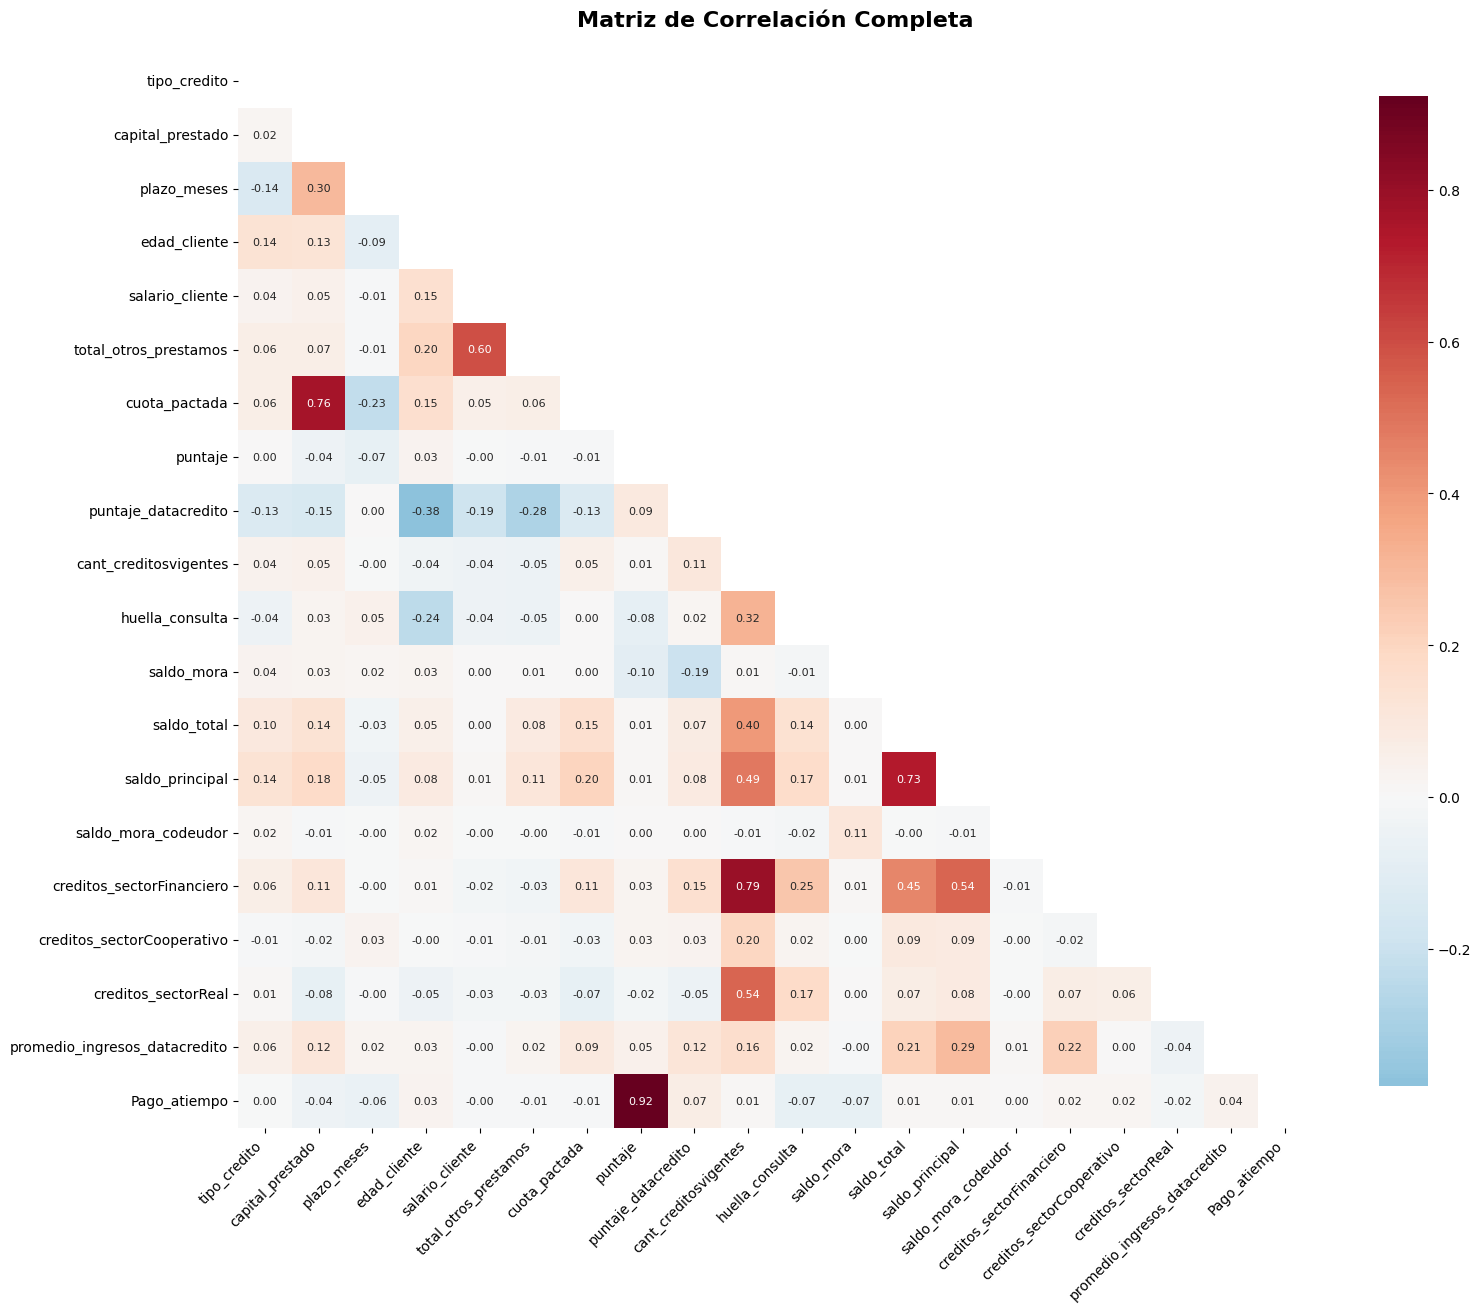


🎯 CORRELACIONES CON VARIABLE OBJETIVO (Pago_atiempo):
------------------------------------------------------------


,Variable,Correlacion,Correlacion_Abs
0,puntaje,0.923,0.923
18,huella_consulta,-0.074,0.074
17,saldo_mora,-0.073,0.073
1,puntaje_datacredito,0.068,0.068
16,plazo_meses,-0.063,0.063
15,capital_prestado,-0.041,0.041
2,promedio_ingresos_datacredito,0.040,0.040
3,edad_cliente,0.032,0.032
14,creditos_sectorReal,-0.023,0.023
4,creditos_sectorFinanciero,0.021,0.021



📊 CLASIFICACIÓN DE VARIABLES POR CORRELACIÓN CON TARGET:
------------------------------------------------------------
🔴 Correlación Muy Fuerte (|r| ≥ 0.7): 1 variables
   → ['puntaje']
🟠 Correlación Fuerte (0.5 ≤ |r| < 0.7): 0 variables
🟡 Correlación Moderada (0.3 ≤ |r| < 0.5): 0 variables
🟢 Correlación Débil (0.1 ≤ |r| < 0.3): 0 variables
⚪ Correlación Muy Débil (|r| < 0.1): 18 variables


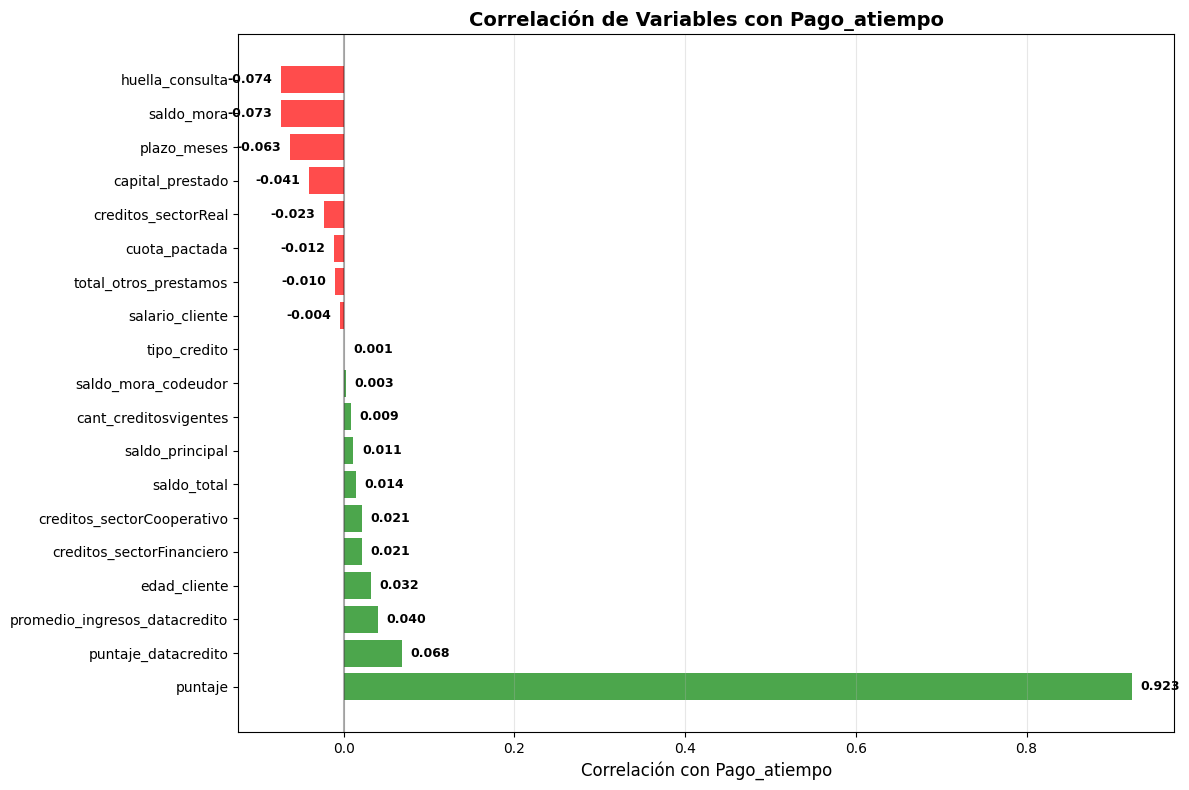


⚠️  ANÁLISIS DE MULTICOLINEALIDAD:
------------------------------------------------------------
Se encontraron 4 pares con correlación ≥ 0.7:
   • capital_prestado ↔ cuota_pactada: 0.764
   • puntaje ↔ Pago_atiempo: 0.923
   • cant_creditosvigentes ↔ creditos_sectorFinanciero: 0.791
   • saldo_total ↔ saldo_principal: 0.735

⚠️  RECOMENDACIONES PARA MULTICOLINEALIDAD:
   • Considerar eliminar una variable de cada par altamente correlacionado
   • O usar técnicas como PCA o regularización (L1/L2)
   • Los modelos de árbol son menos sensibles a este problema

✅ Análisis de correlaciones completado


In [66]:
# 🔗 ANÁLISIS DE CORRELACIONES
# ==============================

print("🔗 ANÁLISIS DE CORRELACIONES")
print("=" * 60)

# 1. Identificar variables numéricas
numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Variables numéricas identificadas: {len(numeric_vars)}")
print(f"Lista: {numeric_vars}")

# 2. Calcular matriz de correlación
print(f"\n📊 Calculando matriz de correlación...")
correlation_matrix = df[numeric_vars].corr()

# 3. Visualización del heatmap completo
print("📈 Generando heatmap de correlaciones...")
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            mask=mask,
            fmt='.2f',
            square=True,
            cbar_kws={"shrink": .8},
            annot_kws={'size': 8})

plt.title('Matriz de Correlación Completa', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# 4. Análisis de correlaciones con la variable objetivo
if 'Pago_atiempo' in numeric_vars:
    print(f"\n🎯 CORRELACIONES CON VARIABLE OBJETIVO (Pago_atiempo):")
    print("-" * 60)
    
    target_correlations = correlation_matrix['Pago_atiempo'].sort_values(ascending=False)
    
    # Excluir la correlación de la variable consigo misma
    target_correlations = target_correlations[target_correlations.index != 'Pago_atiempo']
    
    # Crear DataFrame con resultados
    corr_df = pd.DataFrame({
        'Variable': target_correlations.index,
        'Correlacion': target_correlations.values,
        'Correlacion_Abs': abs(target_correlations.values)
    }).sort_values('Correlacion_Abs', ascending=False)
    
    display(corr_df.round(3))
    
    # 5. Clasificación de correlaciones con el target
    print(f"\n📊 CLASIFICACIÓN DE VARIABLES POR CORRELACIÓN CON TARGET:")
    print("-" * 60)
    
    muy_fuerte = corr_df[corr_df['Correlacion_Abs'] >= 0.7]
    fuerte = corr_df[(corr_df['Correlacion_Abs'] >= 0.5) & (corr_df['Correlacion_Abs'] < 0.7)]
    moderada = corr_df[(corr_df['Correlacion_Abs'] >= 0.3) & (corr_df['Correlacion_Abs'] < 0.5)]
    debil = corr_df[(corr_df['Correlacion_Abs'] >= 0.1) & (corr_df['Correlacion_Abs'] < 0.3)]
    muy_debil = corr_df[corr_df['Correlacion_Abs'] < 0.1]
    
    print(f"🔴 Correlación Muy Fuerte (|r| ≥ 0.7): {len(muy_fuerte)} variables")
    if len(muy_fuerte) > 0:
        print(f"   → {list(muy_fuerte['Variable'])}")
    
    print(f"🟠 Correlación Fuerte (0.5 ≤ |r| < 0.7): {len(fuerte)} variables")
    if len(fuerte) > 0:
        print(f"   → {list(fuerte['Variable'])}")
    
    print(f"🟡 Correlación Moderada (0.3 ≤ |r| < 0.5): {len(moderada)} variables")
    if len(moderada) > 0:
        print(f"   → {list(moderada['Variable'])}")
    
    print(f"🟢 Correlación Débil (0.1 ≤ |r| < 0.3): {len(debil)} variables")
    if len(debil) > 0:
        print(f"   → {list(debil['Variable'])}")
    
    print(f"⚪ Correlación Muy Débil (|r| < 0.1): {len(muy_debil)} variables")
    
    # 6. Visualización de correlaciones con target
    plt.figure(figsize=(12, 8))
    correlations_with_target = target_correlations
    colors = ['red' if x < 0 else 'green' for x in correlations_with_target]
    
    bars = plt.barh(range(len(correlations_with_target)), correlations_with_target.values, 
                    color=colors, alpha=0.7)
    plt.yticks(range(len(correlations_with_target)), correlations_with_target.index, fontsize=10)
    plt.xlabel('Correlación con Pago_atiempo', fontsize=12)
    plt.title('Correlación de Variables con Pago_atiempo', fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.grid(axis='x', alpha=0.3)
    
    # Añadir valores en las barras
    for i, (bar, corr) in enumerate(zip(bars, correlations_with_target.values)):
        plt.text(bar.get_width() + (0.01 if corr > 0 else -0.01), 
                 bar.get_y() + bar.get_height()/2, 
                 f'{corr:.3f}', 
                 ha='left' if corr > 0 else 'right', 
                 va='center',
                 fontsize=9,
                 fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # 7. Detección de multicolinealidad
    print(f"\n⚠️  ANÁLISIS DE MULTICOLINEALIDAD:")
    print("-" * 60)
    
    # Encontrar pares con alta correlación
    high_corr_pairs = []
    threshold = 0.7
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) >= threshold:
                high_corr_pairs.append({
                    'Variable1': correlation_matrix.columns[i],
                    'Variable2': correlation_matrix.columns[j],
                    'Correlacion': corr_val
                })
    
    if high_corr_pairs:
        print(f"Se encontraron {len(high_corr_pairs)} pares con correlación ≥ {threshold}:")
        for pair in high_corr_pairs:
            print(f"   • {pair['Variable1']} ↔ {pair['Variable2']}: {pair['Correlacion']:.3f}")
        
        print(f"\n⚠️  RECOMENDACIONES PARA MULTICOLINEALIDAD:")
        print(f"   • Considerar eliminar una variable de cada par altamente correlacionado")
        print(f"   • O usar técnicas como PCA o regularización (L1/L2)")
        print(f"   • Los modelos de árbol son menos sensibles a este problema")
    else:
        print(f"✅ No se detectó multicolinealidad severa (correlación ≥ {threshold})")
    
else:
    print("❌ No se encontró la variable 'Pago_atiempo' en las variables numéricas")

print(f"\n✅ Análisis de correlaciones completado")

In [21]:
pd.crosstab([df["tipo_laboral"], df["tipo_credito"]], df["Pago_atiempo"], normalize="index") * 100

Pago_atiempo                        0          1
tipo_laboral  tipo_credito                      
Empleado      4              4.136975  95.863025
              6             42.857143  57.142857
              9              4.364090  95.635910
              10             2.666667  97.333333
Independiente 4              5.714286  94.285714
              9              5.188679  94.811321
              10             2.439024  97.560976

In [22]:
pd.crosstab([df["tendencia_ingresos"], df["tipo_laboral"]], df["Pago_atiempo"], normalize="index") * 100

Pago_atiempo                             0          1
tendencia_ingresos tipo_laboral                      
Creciente          Empleado       3.565851  96.434149
                   Independiente  4.824259  95.175741
Decreciente        Empleado       5.869797  94.130203
                   Independiente  7.344633  92.655367
Estable            Empleado       4.489164  95.510836
                   Independiente  4.805915  95.194085

### Se almacenan los datos ya procesados del EDA

In [24]:
df.to_csv('../data/processed/data_cleaned.csv', index=False)